In [45]:
###### valido para Julia 1.7.2
using LinearAlgebra
using Plots
using Graphs #paquetería para graphos
using Random
using GraphPlot #paqueteria para graficar redes
using SparseArrays

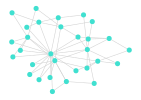

In [46]:
# Barabasi albert 
# Random graph (n:: nodos, n0:: nodos iniciales, k::cada nuevo nodo tiene 2 conexiones)

Nv=30

G=barabasi_albert(Nv, 2, 2,complete=true)
gplot(G)

In [47]:
A=adjacency_matrix(G)

30×30 SparseMatrixCSC{Int64, Int64} with 114 stored entries:
⡮⡫⡚⠦⠲⠎⠒⠎⠂⠖⠁⠑⠎⠒⠐
⠺⡌⢀⠐⡀⠐⠄⠠⢀⠀⠁⠀⢀⠀⠉
⡸⠆⢀⠈⠀⠀⠈⠀⠒⠈⠘⠐⠀⢂⡀
⡸⠄⠀⡁⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⢨⠄⠀⠐⡘⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀
⢅⠀⠁⠀⢒⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀
⢪⠁⠀⠐⠠⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠐⠀⠃⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀

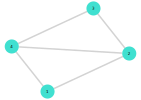

In [104]:
#Red de prueba

g = SimpleGraph(4)  #defeinimos nodos de 1 al 3
add_edge!(g,1,2)    #añadimos una conexión del nodo 1 al 2
add_edge!(g,1,4)    #añadimos una conexión del nodo 1 al 4
add_edge!(g,2,1)    #añadimos una conexión del nodo 2 al 1
add_edge!(g,2,3)    #añadimos una conexión del nodo 2 al 3
add_edge!(g,2,4)    #añadimos una conexión del nodo 2 al 4
add_edge!(g,3,4)    #añadimos una conexión del nodo 3 al 4


gplot(g, nodelabel=1:4)   #graficamos la red

In [334]:
A=adjacency_matrix(g)

4×4 SparseMatrixCSC{Int64, Int64} with 10 stored entries:
 ⋅  1  ⋅  1
 1  ⋅  1  1
 ⋅  1  ⋅  1
 1  1  1  ⋅

# Construcción del operador Coin (Fourier) $C_i$

Con $\theta=2\pi$

$$
\frac{1}{\sqrt{k_{i}}}\left(\begin{matrix}
1      & 1 & 1 & \cdots & 1\\
1      & e^{i\theta/k_{i}}           & e^{2i\theta/k_{i}}  & \cdots & e^{(k_{i}-1)i\theta/k_{i}}\\
1      & e^{2i\theta/k_{i}}          & e^{4i\theta/k_{i}}  & \cdots & e^{2(k_{i}-1)i\theta/k_{i}}\\
\vdots & \vdots                      & \vdots              & \ddots & \vdots\\
1      & e^{(k_{i}-1)i\theta/k_{i}}  & e^{2(k_{i}-1)i\theta/k_{i}} & \cdots & e^{(k_{i}-1)(k_{i}-1)i\theta/k_{i}}
\end{matrix}\right)
$$

In [469]:
F(theta,i,j,k)=exp(im*theta*i*j/k) #son las entradas de la matriz, las exponenciales

F (generic function with 1 method)

In [470]:
function Coin_Fourier(k,theta=2*pi)   #genera la matriz
    Cki=zeros(Complex,k,k)
    Cki[1,:].=1                # se le agrega 1's a la primera fila
    Cki[:,1].=1                # se le agrega 1's a la primera columna
    for i=1:k-1                #  En este for se va a recorrer cada fila y columna
        for j=1:k-1               ## junto con este otro for
            Cki[j+1,i+1]=F(theta,i,j,k) # se utiliza la función F que se definio arriba
        end
    end
   return (1/sqrt(k))*Cki  # se le multiplica por el 1/sqrt(grado) al que corresponde 
end

Coin_Fourier (generic function with 2 methods)

In [471]:
k=3 # si tenemos un nodo con grado 3

Cik=Coin_Fourier(k,2*pi) #genera un matriz de 3x3 

3×3 Matrix{ComplexF64}:
 0.57735+0.0im    0.57735+0.0im    0.57735+0.0im
 0.57735+0.0im  -0.288675+0.5im  -0.288675-0.5im
 0.57735+0.0im  -0.288675-0.5im  -0.288675+0.5im

In [472]:
v=zeros(k)
v[1]=1
v # un vector de dim 3  

3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [473]:
Cik*v #la coin lo que hace es colocarle las otras dos componentes

3-element Vector{ComplexF64}:
 0.5773502691896258 + 0.0im
 0.5773502691896258 + 0.0im
 0.5773502691896258 + 0.0im

In [474]:
1/sqrt(k) ## con el mismo peso

0.5773502691896258

# Asignación de bases

Cada nodo se le puede ver como un espacio de Hilbert $\mathcal{H}_i$ de dimensión $k_i$, entonces se esocge asignarle una base canonica a cada uno, es decir para cada nodo $i$ se le asigna una base:
$$ 
\left\{ e_{1}^{(j_{1})}, e_{2}^{(j_{2})}, e_{2}^{(j_{2})},\cdots, e_{k_i}^{(j_{k_i})}  \right\}_{i},
$$
En otras palabras se le asigna una base canonica a cada nodo dependiendo de el grado $k_i$ de cada uno.


In [475]:
## Neceisto algo que si le doy un nodo me diga que base se le asigna###
function Base_del_Nodo(Nodo,A)
    k=sum(A[Nodo,:]) # Sumamos cada entrada eso nos dará el grado del nodo
    Id=Matrix(1I, k, k) # generamos la matriz identidad que corresponde al grado
    return Id #La retorna
              ## Esto genera la base segun sea el grado de cada nodo
end

Basis=Base_del_Nodo(4,A)

3×3 Matrix{Int64}:
 1  0  0
 0  1  0
 0  0  1

In [476]:
# Otra cosa que puede o no sobrar es los proyectores.
### Al aplicar la compuerta Coin no nos dara explicitamente quienes son los componentes
##NOTA; puede que sobre esta función 

function Proyector_Nodo(Nodo,lugar)
    k=sum(A[Nodo,:]) # Sumamos cada entrada eso nos dará el grado del nodo
    Proyector=zeros(k,k)
    Proyector[lugar,lugar]=1
    return Proyector
end

#prueba
Proyector_Nodo(4,3)

3×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  1.0

# Empecemos con una prueba 
Supongamos que empezamos en el nodo 1, como tiene dos conexiones su grado es $k_1=2$. Un estado posible puede ser
$$
\psi_{1,2}|1\rightarrow 2 \rangle +\psi_{1,4}|1\rightarrow 4 \rangle
$$
con $\psi_{1,2}=\psi_{1,4}=\frac{1}{\sqrt{2}}$

Aprovechando... introduciremos la matriz $\psi_{i,j}$ que contiene todos los pesos dirgidos en este caso será así 
$$
\left(\begin{matrix}
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 
\end{matrix}\right)
$$

In [477]:
## matriz psi
ψ=sparse(zeros(Complex,size(A)))

ψ[1,2]=1/sqrt(2)
ψ[1,4]=1/sqrt(2)
ψ

4×4 SparseMatrixCSC{Complex, Int64} with 2 stored entries:
   ⋅    0.707107+0.0im    ⋅    0.707107+0.0im
   ⋅             ⋅        ⋅             ⋅  
   ⋅             ⋅        ⋅             ⋅  
   ⋅             ⋅        ⋅             ⋅  

In [478]:
### El vector del paso 0; es decir el vector del nodo 1
Nodos_de_i=rowvals(A[1,:])   # nodos de 1
Basis=Base_del_Nodo(1,A)     # base del nodo 1

vec=[0,0]
for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
vec+=Basis[:,index]*ψ[1,value]           # construimos el vector correspondiente del nodo 1 Basis es la base y psi es el peso
end
vec  # Este es el vector del nodo 1

2-element Vector{ComplexF64}:
 0.7071067811865475 + 0.0im
 0.7071067811865475 + 0.0im

In [479]:
#Al vector le aplicamos el operador moenda
k=sum(A[1,:])  # calculamos
vec1=Coin_Fourier(k)*vec  ## El vector despues de la moenda de Fourier 




2-element Vector{ComplexF64}:
 0.9999999999999998 + 0.0im
                0.0 + 6.123233995736765e-17im

In [480]:
## Hay que reemplazar los pesos (SEGUIMOS EN EL NODO 1)
for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
#println(ψ[1,value])
#println(vec1[index])
ψ[1,value]=vec1[index]
end
ψ

4×4 SparseMatrixCSC{Complex, Int64} with 2 stored entries:
   ⋅    1.0+0.0im    ⋅    0.0+6.12323e-17im
   ⋅        ⋅        ⋅        ⋅  
   ⋅        ⋅        ⋅        ⋅  
   ⋅        ⋅        ⋅        ⋅  

Hasta ahora solo hemos aplicado el operador Moenda de Fourier $C_1^F$, en este caso como tiene dos nodos conectados es equivalente a la Hadamar.
$$
C_1^F=\frac{1}{\sqrt{2}}\left(\begin{matrix}
1 & 1  \\
1 & -1  
\end{matrix}\right)
$$
Ahora hay que aplicar el operado Shift $S$ 
$$
S|i\rightarrow j\rangle=|j\rightarrow i\rangle
$$
Esto provocará que ahora tengamos vectores en $j$
En terminos de los pesos... eso es la transpuesta de $\psi_{i,j}$

In [481]:
#Ahora hay que implementar el operador Shift que hace el traslado
# estabamos en el nodo 1, entonces el vector tiene componentes que apuntan a 2 y 4, entonces de vectores con
# | 1->2 > y | 1->4 > pasa a ser | 1->2 > y | 4->1 >
#para construir el vector nos basamos en la matriz psi de pesos podemos haer esto



### operador S### es solo el trasnpuesto de la matriz ψ
ψ=sparse(transpose(ψ))
## Aqui termina el paso... aunque no hemos definido los nuevos vectores

4×4 SparseMatrixCSC{Complex, Int64} with 2 stored entries:
     ⋅                ⋅      ⋅      ⋅  
 1.0+0.0im            ⋅      ⋅      ⋅  
     ⋅                ⋅      ⋅      ⋅  
 0.0+6.12323e-17im    ⋅      ⋅      ⋅  

# Intento de automatizar

In [610]:
## matriz psi
ψ=sparse(zeros(Complex,size(A)))

ψ[1,2]=1/sqrt(2)
ψ[1,4]=1/sqrt(2)
println("Nodo 1")
println(ψ[1,:])
println("Nodo 2")
println(ψ[2,:])
println("Nodo 3")
println(ψ[3,:])
println("Nodo 4")
println(ψ[4,:])

Nodo 1
  [2]  =  0.707107+0.0im
  [4]  =  0.707107+0.0im
Nodo 2
4-element SparseVector{Complex, Int64} with 0 stored entries
Nodo 3
4-element SparseVector{Complex, Int64} with 0 stored entries
Nodo 4
4-element SparseVector{Complex, Int64} with 0 stored entries


Nodo 1
  [2]  =  -0.296786-0.0714741im
  [4]  =  -0.184424+0.157572im
Nodo 2
  [1]  =  0.100945-0.094444im
  [3]  =  0.0023191-0.000295855im
  [4]  =  -0.0728582+0.202078im
Nodo 3
  [2]  =  -0.558504+0.207303im
  [4]  =  -0.039128-0.135169im
Nodo 4
  [1]  =  0.0932384+0.0498444im
  [2]  =  -0.316476+0.408986im
  [3]  =  -0.347114+0.0944226im


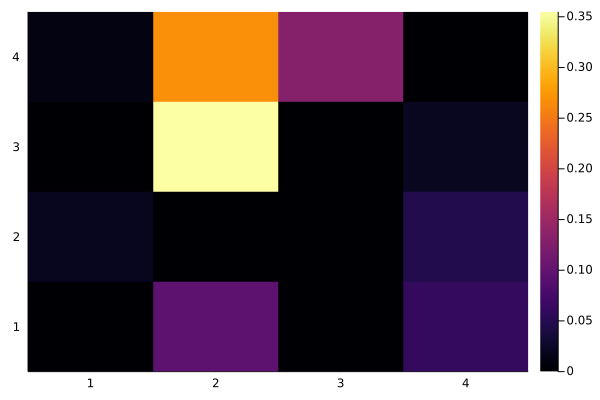

In [662]:
### Para ver que vectores hay hay que recorrer cada uno... PARA UNA MATRIZ ψ DADA

for i=1:4   #PAra un nodo i me va a dar el vector que le corresponde Ö

    if rowvals(ψ[i,:])==[]
       continue 
    else
       #println(ψ[i,:]) 
    end

    Nodos_de_i=rowvals(A[i,:])   # nodos de i
    Basis=Base_del_Nodo(i,A)     # base del nodo i


    v=zeros(length(Nodos_de_i))
    for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
    v+=Basis[:,index]*ψ[i,value]
    end


    #Al vector le aplicamos el operador moenda
    k=sum(A[i,:])  # calculamos
    v=Coin_Fourier(k)*v  ## El vector despues de la moenda de Fourier 


    ## Hay que reemplazar los pesos (SEGUIMOS EN EL NODO 1)
    for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
        ψ[i,value]=v[index]
    end
end
### operador S### es solo el trasnpuesto de la matriz ψ
ψ=sparse(transpose(ψ))

println("Nodo 1")
println(ψ[1,:])
println("Nodo 2")
println(ψ[2,:])
println("Nodo 3")
println(ψ[3,:])
println("Nodo 4")
println(ψ[4,:])

plot(heatmap(abs2.(Matrix(ψ))))

In [ ]:
## Esta función hace la evolución pero no basta para reproducir lo del articulo hAY QUE PONERLE UN PARCHE

function U_evolution(n,A,ψ)

    ### Para ver que vectores hay hay que recorrer cada uno... PARA UNA MATRIZ ψ DADA
    for t=1:n
        for i=1:size(A)[1]   #PAra un nodo i me va a dar el vector que le corresponde Ö

            if rowvals(ψ[i,:])==[]       # si no hay ningún peso entonces continua
               continue 
            else
               #println(ψ[i,:]) 
            end

            Nodos_de_i=rowvals(A[i,:])   # nodos de i
            Basis=Base_del_Nodo(i,A)     # base del nodo i


            v=zeros(length(Nodos_de_i)) # el vector del nodo i
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
            v+=Basis[:,index]*ψ[i,value]
            end


            #Al vector le aplicamos el operador moenda
            k=sum(A[i,:])  # calculamos
            v=Coin_Fourier(k)*v  ## El vector despues de la moenda de Fourier 


            ## Hay que reemplazar los pesos (SEGUIMOS EN EL NODO 1)
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
                ψ[i,value]=v[index]
            end
        end
        ### operador S### es solo el trasnpuesto de la matriz ψ
        ψ=sparse(transpose(ψ))
    end
    return ψ
end